# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
keras.backend.clear_session() # 把舊的 Graph 清掉
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    print(x.shape)
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
def build_mlp(input_shape, output_units=10):
    input_layer = keras.layers.Input(input_shape)
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)  
    x = keras.layers.Dense(units=64, activation="relu")(x)  
    x = keras.layers.Dense(units=32, activation="relu")(x)  
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=input_layer, outputs=out)
    
    return model

In [6]:
EPOCHS = 20
BATCH_SIZE = 256
OPTIMIZERS = ['SGD', 'RMSprop', 'Adagrad', 'Adam']

In [7]:
results = {}

for opt in OPTIMIZERS:
    keras.backend.clear_session() # 把舊的 Graph 清掉

   
    model = build_mlp(input_shape=x_train.shape[1:])

    print("Experiment with optimizer : %s" % (opt))

    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "opt-%s" % str(opt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with optimizer : SGD
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 68us/step - loss: 2.1456 - accuracy: 0.2128 - val_loss: 2.0858 - val_accuracy: 0.2115
Epoch 2/20
50000/50000 [==============================] - 3s 59us/step - loss: 1.9797 - accuracy: 0.2848 - val_loss: 2.0198 - val_accuracy: 0.2594
Epoch 3/20
50000/50000 [==============================] - 3s 59us/step - loss: 1.8967 - accuracy: 0.3213 - val_loss: 1.9271 - val_accuracy: 0.3194
Epoch 4/20
50000/50000 [==============================] - 3s 55us/step - loss: 1.8362 - accuracy: 0.3434 - val_loss: 1.8312 - val_accuracy: 0.3366
Epoch 5/20
50000/50000 [==============================] - 3s 61us/step - loss: 1.7873 - accuracy: 0.3606 - val_loss: 1.7747 - val_accuracy: 0.3499
Epoch 6/20
50000/50000 [==============================] - 3s 56us/step - loss: 1.7509 - accuracy: 0.3745 - val_loss: 1.7669 - val_accuracy: 0.3645
Epoch 7/20
50000/50000 [============

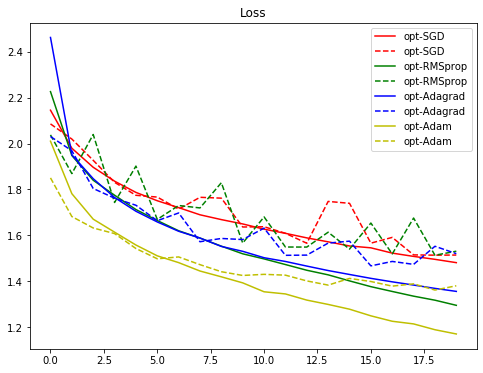

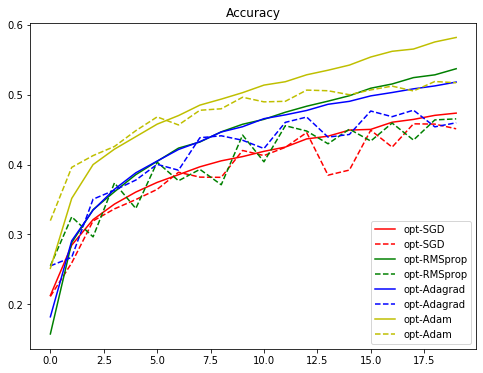

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()